In [134]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

In [135]:
mnist = tf.keras.datasets.mnist

In [136]:
mnist

<module 'keras.api.datasets.mnist' from 'D:\\israe\\Nueva carpeta\\Lib\\site-packages\\keras\\api\\datasets\\mnist\\__init__.py'>

In [137]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [138]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

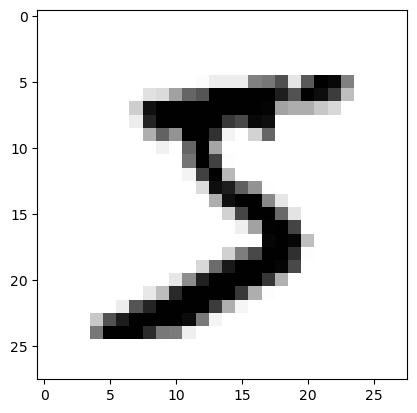

In [139]:
plt.imshow(x_train[0], cmap='binary')
plt.savefig('number')

In [189]:
mod = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'), 

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [190]:
mod.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)                   │ (None, 27, 27, 32)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 100)                 │         230,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250,166 (977.21 KB)

 Trainable params: 250,166 (977.21 KB)

 Non-trainable params: 0 (0.00 B)

In [191]:
mod.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [202]:
mod.fit(x_train, y_train, epochs=28)

Epoch 1/28
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9977 - loss: 0.0066
Epoch 2/28
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9983 - loss: 0.0062
Epoch 3/28
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9980 - loss: 0.0065
Epoch 4/28
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9979 - loss: 0.0059
Epoch 5/28
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9976 - loss: 0.0083
Epoch 6/28
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9981 - loss: 0.0071
Epoch 7/28
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9985 - loss: 0.0061
Epoch 8/28
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9985 - loss: 0.0049
Epoch 9/28
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9979 - loss: 0.0066
Epoch 10/28
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9984 - loss: 0.0055
Epoch 11/28
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9984 - loss: 0.0058
Epoch 12

In [210]:
mod.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9916 - loss: 0.0675


[0.06749618053436279, 0.991599977016449]

In [211]:
pred = mod(x_train[:3]).numpy()
pred

array([[0.0000000e+00, 1.0096906e-37, 0.0000000e+00, 2.6327758e-11,
        0.0000000e+00, 1.0000000e+00, 9.0166298e-29, 2.9457199e-37,
        1.0716120e-23, 4.5114270e-25],
       [1.0000000e+00, 1.2034150e-27, 1.6004100e-32, 1.4416784e-35,
        1.0057564e-33, 2.9426632e-23, 8.3786575e-13, 2.7728087e-35,
        9.1267272e-25, 5.7609275e-23],
       [0.0000000e+00, 6.3743587e-15, 5.2814742e-27, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.1768629e-38,
        4.4996913e-31, 9.8775824e-23]], dtype=float32)

In [205]:
pred_test = mod(x_test[:]).numpy()
pred_test.shape

(10000, 10)

In [206]:
y_predc = np.argmax(pred_test, axis=1)
y_predc

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [207]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [208]:
mat_conf = confusion_matrix(y_test, y_predc)

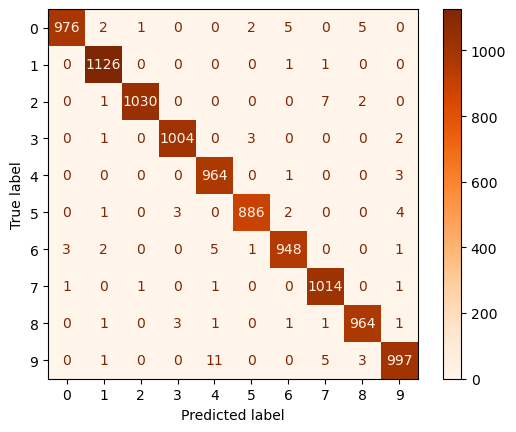

In [209]:
mat = ConfusionMatrixDisplay(confusion_matrix=mat_conf, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Oranges)
plt.savefig('conf')